# Problem Set 3 

## Pravneet Singh - BDAT 1004 Data Programming Section - C

### Question 1 :

Introduction: 

Occupations 

Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address. 

Step 3. Assign it to a variable called users 

Step 4. Discover what is the mean age per occupation 

Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

Step 6. For each occupation, calculate the minimum and maximum ages 

Step 7. For each combination of occupation and sex, calculate the mean age 

Step 8. For each occupation present the percentage of women and men 

In [1]:
#Step 1 Import the necessary libraries

import numpy as np  # Import Numpy library and use the standard abbreviation \"np\"\n"
import pandas as pd # Import Pandas library and use the standard abbreviation \"pd\"\n"

import urllib

In [2]:
#Step 2 Import the dataset from this address.


dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

urlRequest = urllib.request.Request(dataset_url)
users_file = urllib.request.urlopen(urlRequest)

In [3]:
#Step 3 Assign it to a variable called users

users=pd.read_csv(users_file,sep='|',header=0,names=['user_id','age','gender','occupation','zip_code'])
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Step 4 Discover what is the mean age per occupation


users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [7]:
#Step 5 Discover the Male ratio per occupation and sort it from the most to the least

# create a function to convert gender to numeric values
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# create a new dataframe with the total number of M and F per occupation
gender_occ = users.groupby(['occupation', 'gender_n']).gender.count()

# create a new dataframe with the total number of M per occupation
total_occ = users.groupby('occupation').gender.count()

# calculate the Male ratio per occupation
male_ratio = gender_occ.loc[:,1] / total_occ * 100

# sort the values from the most to the least
male_ratio.sort_values(ascending=False, inplace=True)
male_rati

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [8]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [9]:
# Step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
# Step 8. For each occupation present the percentage of women and men

occupation = users.groupby(['occupation'])
men_and_women = occupation.gender
precentage=(men_and_women.value_counts(normalize=True)*100).round(1).astype(str)+'%'
pd.DataFrame({'presentage':precentage})

presentage
occupation    gender           
administrator M           54.4%
              F           45.6%
artist        M           53.6%
              F           46.4%
doctor        M          100.0%
educator      M           72.6%
              F           27.4%
engineer      M           97.0%
              F            3.0%
entertainment M           88.9%
              F           11.1%
executive     M           90.6%
              F            9.4%
healthcare    F           68.8%
              M           31.2%
homemaker     F           85.7%
              M           14.3%
lawyer        M           83.3%
              F           16.7%
librarian     F           56.9%
              M           43.1%
marketing     M           61.5%
              F           38.5%
none          M           55.6%
              F           44.4%
other         M           65.7%
              F           34.3%
programmer    M           90.9%
              F            9.1%
retired       M           92.9%
              F            7.1%
salesman      M           75.0%
              F           25.0%
scientist     M           90.3%
              F            9.7%
student       M           69.4%
              F           30.6%
technician    M           96.3%
              F            3.7%
writer        M           57.8%
              F           42.2%

### Question 2 :

#### Euro Teams 

Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address 

Step 3. Assign it to a variable called euro12 

Step 4. Select only the Goal column 

Step 5. How many team participated in the Euro2012? 

Step 6. What is the number of columns in the dataset? 

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline 

Step 8. Sort the teams by Red Cards, then to Yellow Cards 

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start with G 

Step 12. Select the first 7 columns 

Step 13. Select all columns except the last 3 

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [11]:
#Step 1. Import the necessary libraries 

import pandas as pd
import urllib
import numpy as np

In [12]:
#Step 2. Import the dataset from this address

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

In [13]:
#Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv(url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [15]:
#Step 4. Select only the Goal column

goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [18]:
#Step 5. How many teams participated in the Euro2012?

num_teams = euro12['Team'].count()
print(num_teams)
print('The number of teams that participated in the Euro2012 is:', num_teams)

16
The number of teams that participated in the Euro2012 is: 16


In [19]:
#Step 6. What is the number of columns in the dataset?

num_columns = euro12.shape[1]
print(num_columns)
print('The number of columns in the dataset is:', num_columns)

35
The number of columns in the dataset is: 35


In [20]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [24]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_yellow_cards = euro12['Yellow Cards'].mean()
print(mean_yellow_cards)
print('The mean Yellow Cards given per team is:', mean_yellow_cards)

7.4375
The mean Yellow Cards given per team is: 7.4375


In [25]:
#Step 10. Filter teams that scored more than 6 goals

euro12.loc[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [26]:
#Step 11. Select the teams that start with G

euro12[euro12['Team'].str.contains('^G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [27]:
#Step 12. Select the first 7 columns

euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [28]:
#Step 13. Select all columns except the last 3

euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [29]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3:

#Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4 
• The second a random number from 1 to 3 
• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [30]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

In [31]:
#Step 2. Create 3 different Series, each of length 100, as follows:

# Create the first series
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Create the second series
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Create the third series
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [32]:
# Step 3. Create a DataFrame by joinning the Series by column

df=pd.DataFrame({'Series 1':series1,'Series 2':series2,'Series 3':series3})
df

,Series 1,Series 2,Series 3
0,3,3,20345
1,2,2,11173
2,1,2,23699
3,2,1,22209
4,3,2,25680
...,...,...,...
95,3,2,24417
96,3,2,23569
97,3,2,18259
98,2,3,25547


In [33]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df=df.rename(columns={'Series 1':'bedrs','Series 2':'bathrs','Series 3':'price_sqr_meter'})
df

,bedrs,bathrs,price_sqr_meter
0,3,3,20345
1,2,2,11173
2,1,2,23699
3,2,1,22209
4,3,2,25680
...,...,...,...
95,3,2,24417
96,3,2,23569
97,3,2,18259
98,2,3,25547


In [40]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

df2=pd.concat([series1,series2,series3],axis=0)
df2

0         3
1         2
2         1
3         2
4         3
      ...  
95    24417
96    23569
97    18259
98    25547
99    11300
Length: 300, dtype: int32

In [46]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
df2.tail()

95    24417
96    23569
97    18259
98    25547
99    11300
dtype: int32

Yes!

In [47]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

df2=pd.concat([series1,series2,series3],axis=0,ignore_index=True)
df2

0          3
1          2
2          1
3          2
4          3
       ...  
295    24417
296    23569
297    18259
298    25547
299    11300
Length: 300, dtype: int32

### Question 4:

Wind Statistics  

The data have been modified to contain some missing values, identified by NaN. 

Using pandas should make this exercise easier, in particular for the bonus question.  

You should be able to perform all of these operations without using a for loop or other looping construct.

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day. 

Step 1. Import the necessary libraries 

Step 2. Import the dataset from the attached file wind.txt 

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. 

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. 

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. 

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. 

Step 7. Compute how many non-missing values there are in total. 

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. 

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. 

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. 

Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. 

Step 12. Downsample the record to a yearly frequency for each location. 

Step 13. Downsample the record to a monthly frequency for each location. 

Step 14. Downsample the record to a weekly frequency for each location. 

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [56]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime

In [61]:
# Step 2. Import the dataset from the attached file wind.txt

data=pd.read_fwf('wind.txt')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [62]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [63]:
# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [64]:
# Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data = data.set_index("Date")
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [65]:
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [66]:
# Step 6: Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.


print("Number of missing values for each location:")
print(data.isnull().sum())

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [68]:
# Step 7: Compute how many non-missing values there are in total.

print("Total number of non-missing values:")
print(data.notnull().sum().sum())

Total number of non-missing values:
78857


In [69]:
#Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

print("Mean windspeed over all locations and times:")
print(data.mean().mean())

Mean windspeed over all locations and times:
10.227982360836938


In [70]:
#Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

print("Statistics for each location:")
print(loc_stats)

Statistics for each location:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [71]:
#Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

print("Statistics for each day:")
print(day_stats)

Statistics for each day:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [72]:
#Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

january_data = data[data.index.month == 1]
january_means = january_data.mean()
print("Average windspeed in January for each location:")
print(january_means)

Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [73]:
# Step 12: Downsample the record to a yearly frequency for each location.

yearly_data = data.resample('AS').mean()
print("Yearly windspeed data for each location:")
print(yearly_data)

Yearly windspeed data for each location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-01-01  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-01-01  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-01-01  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-01-01  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-01-01  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-01-01  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-01-01  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-01-01  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-01-01  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-01-01  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-01-01  11.273123  

In [74]:
# Step 13: Downsample the record to a monthly frequency for each location.

monthly_data = data.resample('MS').mean()
print("Monthly windspeed data for each location:")
print(monthly_data)

Monthly windspeed data for each location:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-01  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-01  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-01  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-01  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-01   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-01   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-01  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-01   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-01  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-01

In [75]:
# Step 14: Downsample the record to a weekly frequency for each location.

data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [76]:
# Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

weekly_data = data.resample('W', closed='left', label='left').mean().iloc[1:53]
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(weekly_stats)

                  min        max       mean       std
Date                                                 
1961-01-08   5.135714  12.422857   8.895000  2.688046
1961-01-15   6.357143  13.554286   9.242639  2.378738
1961-01-22  10.524286  20.607143  14.920476  2.978190
1961-01-29   9.091429  16.482857  12.655893  2.623683
1961-02-05  11.238571  20.964286  16.036548  2.969975
1961-02-12   9.840000  20.564286  13.694881  2.940274
1961-02-19   7.410000  17.275714  11.719524  2.708721
1961-02-26   8.572857  19.450000  13.123929  2.729939
1961-03-05   5.221429  15.427143  10.075357  2.666391
1961-03-12   7.667143  20.665714  12.715873  3.473851
1961-03-19   6.268571  16.540000   9.801429  2.811322
1961-03-26   8.160000  15.257143  11.278036  1.967494
1961-04-02   5.221429  12.465714   8.756190  2.388746
1961-04-09   5.625714  10.202857   7.659881  1.700484
1961-04-16   6.720000  13.882857   9.456429  2.256780
1961-04-23   5.391429  10.194286   7.725119  1.539175
1961-04-30   8.678571  15.48

### Question 5:

Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address. 

Step 3. Assign it to a variable called chipo. 

Step 4. See the first 10 entries 

Step 5. What is the number of observations in the dataset? 

Step 6. What is the number of columns in the dataset? 

Step 7. Print the name of all the columns. 

Step 8. How is the dataset indexed? 

Step 9. Which was the most-ordered item? 

Step 10. For the most-ordered item, how many items were ordered? 

Step 11. What was the most ordered item in the choice_description column? 

Step 12. How many items were orderd in total? 

Step 13. • Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type 

Step 14. How much was the revenue for the period in the dataset? 

Step 15. How many orders were made in the period? 

Step 16. What is the average revenue amount per order? 

Step 17. How many different items are sold? 

In [77]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np
import urllib

In [78]:
# Step 2. Import the dataset from this address.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

In [79]:
# Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(url, delimiter='\t')

In [81]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [82]:
# Step 5. What is the number of observations in the dataset?

chipo.shape[0]

4622

In [83]:
# Step 6. What is the number of columns in the dataset?

chipo.shape[1]

5

In [84]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [85]:
# Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [88]:
# Step 9. Which was the most-ordered item?

most_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

C:\Users\admin\AppData\Local\Temp\ipykernel_6344\1482141777.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Chicken Bowl is the most ordered item.

In [89]:
# Step 10. For the most-ordered item, how many items were ordered?

most_ordered.iloc[0]['quantity']

761

In [90]:
#Step 11. What was the most ordered item in the choice_description column?

most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

C:\Users\admin\AppData\Local\Temp\ipykernel_6344\204773542.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Diet Coke

In [91]:
# Step 12. How many items were ordered in total?

total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

In [93]:
#Step 13. Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type

# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# Check the item price type
chipo['item_price'].dtype

dtype('float64')

In [94]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

39237.02

In [95]:
# Step 15. How many orders were made in the period?

orders = chipo['order_id'].nunique()
orders

1834

In [96]:
#Step 16. What is the average revenue amount per order?

# calculate total revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

# calculate average revenue per order
num_orders = chipo['order_id'].nunique()
avg_revenue_per_order = total_revenue / num_orders

print('Average revenue amount per order: $', round(avg_revenue_per_order, 2))

Average revenue amount per order: $ 21.39


In [97]:
#Step 17. How many different items are sold?

chipo['item_name'].nunique()

50

### Question 6:

Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.

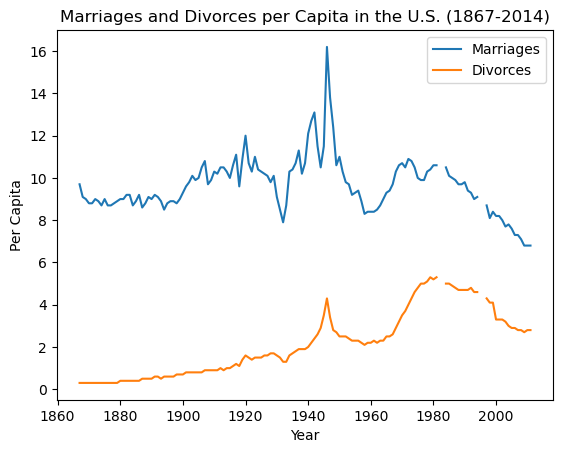

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# create a line plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

# set the labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# show the plot
plt.show()

### Question 7:

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

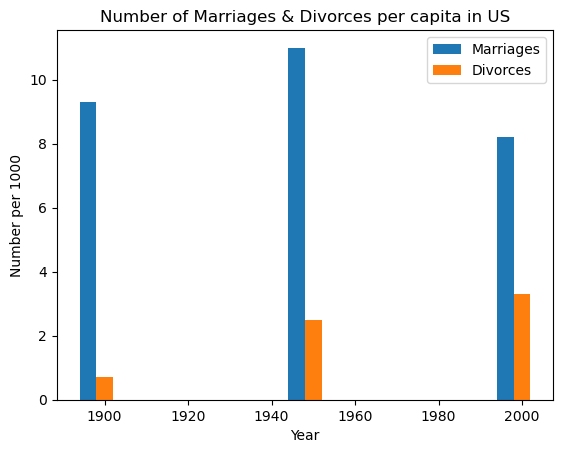

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read in the data from CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


# Step 2: Create a vertical bar chart comparing the number of marriages and divorces per capita in 1900, 1950, and 2000
subset = data[data['Year'].isin([1900, 1950, 2000])]
plt.bar(subset['Year']-4, subset['Marriages_per_1000'], width=4, label='Marriages')
plt.bar(subset['Year'], subset['Divorces_per_1000'], width=4, label='Divorces')

# Step 3: Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.legend()

plt.title('Number of Marriages & Divorces per capita in US')

# Step 4: Show the plot
plt.show()

### Question 8:

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

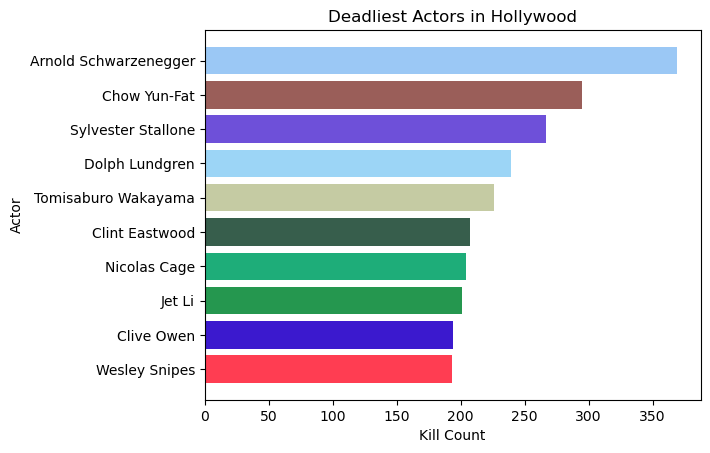

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('actor_kill_counts.csv')

# Sort the data by kill count
data = data.sort_values('Count')

#Choosing a color scheme
colours = ['#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

# Create a horizontal bar chart
plt.barh(data['Actor'], data['Count'], color=colours)

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Show the plot
plt.show()

### Question 9:

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

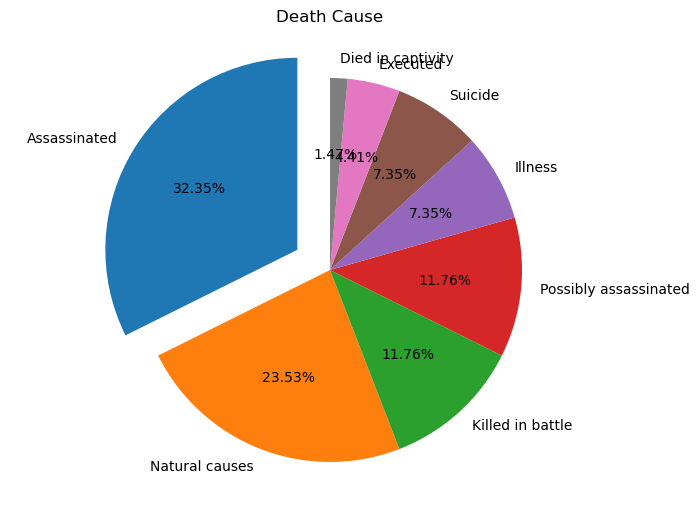

In [108]:
#import numpy as np
import pandas as pd
#import os
import matplotlib.pyplot as plt

roman_data = pd.read_csv('roman-emperor-reigns.csv')

data = roman_data.groupby(['Cause_of_Death']).Cause_of_Death.agg('count').to_frame('Count').reset_index()
data = data.sort_values(by='Count', ascending=False)
labels = data['Cause_of_Death'].unique()


counts = roman_data['Cause_of_Death'].value_counts()
l = list(counts)
fig = plt.figure()
explode = (0.2,0,0,0,0,0,0,0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Death Cause')
ax.pie(l, labels = labels,explode = explode, autopct='%1.2f%%',startangle=90)
plt.show()

### Question 10:

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

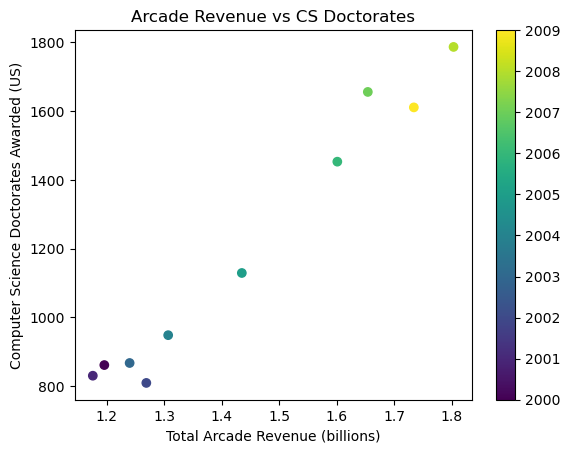

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create a scatter plot with revenue on the x-axis, number of CS PhDs on the y-axis, and colored by year
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

plt.title('Arcade Revenue vs CS Doctorates')

# Add labels for the x-axis and y-axis
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

# Add a colorbar to show the year values
plt.colorbar()

# Display the plot
plt.show()